In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
db_full = pd.read_csv('02-14-2018.csv')

In [3]:
db_full['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [7]:
categories = {}
for key, value in enumerate(db_full['Label'].unique()):
    categories[value] = key + 1
    
db_full['Category_Label'] = db_full['Label'].map(categories)

In [135]:
db_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 81 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

# 1. Метод отбора признаков с использованием матрицы корреляции

In [9]:
corr_db_full = db_full.corr()

In [10]:
corr_db_full.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Category_Label
Dst Port,1.000000,-0.149786,-0.001213,-0.027925,-0.019058,-0.006846,-0.009166,-0.136013,-0.130417,-0.151811,...,-0.099956,-0.004466,-0.029108,-0.018647,0.001387,-0.001392,-0.000585,-0.000859,-0.024388,-0.234100
Protocol,-0.149786,1.000000,-0.000735,-0.053932,-0.027186,-0.011833,-0.013706,-0.215320,0.848329,0.040990,...,-0.641613,-0.040010,-0.049885,-0.056074,-0.030840,-0.005845,-0.003154,-0.004062,-0.083192,-0.329080
Flow Duration,-0.001213,-0.000735,1.000000,-0.004347,0.002155,0.000315,0.001709,0.005057,-0.001776,0.003074,...,0.000483,0.003740,0.007167,0.006719,0.002392,-0.741625,-0.733106,-0.727972,-0.670767,-0.003390
Tot Fwd Pkts,-0.027925,-0.053932,-0.004347,1.000000,0.884435,0.059293,0.876120,0.157616,-0.047845,0.087371,...,0.009406,0.090445,0.097516,0.122811,0.072095,0.012645,0.011367,0.011825,0.048536,0.029281
Tot Bwd Pkts,-0.019058,-0.027186,0.002155,0.884435,1.000000,0.061203,0.996830,0.091137,-0.024928,0.041858,...,0.001234,0.096751,0.084795,0.120692,0.081173,0.001244,-0.000005,0.000388,0.038149,0.003248


<AxesSubplot:>

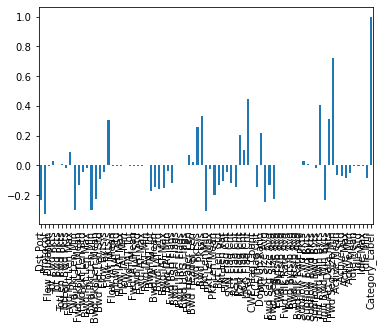

In [11]:
corr_db_full['Category_Label'].plot.bar()

### 1.а Наиболее весомые признаки

In [133]:
for par_name, data in corr_db_full['Category_Label'].items():
    if (data >= 0.3) and (data < 1):
        print("par_name:",par_name , "\ndata:",data)
    if (data <= -0.23):
        print("par_name:",par_name , "\ndata:",data)

par_name: Dst Port 
data: -0.23409971391319784
par_name: Protocol 
data: -0.32908001446025736
par_name: Fwd Pkt Len Min 
data: -0.29991945446036755
par_name: Bwd Pkt Len Min 
data: -0.3018038159241152
par_name: Flow Pkts/s 
data: 0.3043681047337297
par_name: Bwd Pkts/s 
data: 0.33551193150231967
par_name: Pkt Len Min 
data: -0.30659632325219893
par_name: URG Flag Cnt 
data: 0.4452599889867894
par_name: Pkt Size Avg 
data: -0.2432147999130297
par_name: Init Fwd Win Byts 
data: 0.40893690799609356
par_name: Fwd Act Data Pkts 
data: 0.3116596446482561
par_name: Fwd Seg Size Min 
data: 0.7204265544731011


In [65]:
db = db_full[['Dst Port', 'Protocol', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
             'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Mean', 'PSH Flag Cnt',
             'URG Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Seg Size Avg', 'Init Fwd Win Byts',
             'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Category_Label']]

In [81]:
db.describe()

,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Min,Bwd Pkt Len Mean,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Mean,PSH Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Category_Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,8.389535e+00,2.016587e+01,9.275989e+01,1.413886e+05,1.258575e+05,8.322709e+00,6.311424e+01,5.254312e-01,1.211463e-01,6.634537e-01,7.144445e+01,9.275989e+01,1.050166e+04,6.142295e+03,2.793536e+00,2.327970e+01,1.542201e+00
std,1.444344e+04,4.460625e+00,1.948279e+01,4.653823e+01,1.579997e+02,3.085265e+05,2.670306e+05,1.890669e+01,1.007340e+02,4.993531e-01,3.262974e-01,5.652833e-01,1.051520e+02,1.579997e+02,1.293709e+04,1.814980e+04,5.557106e+00,1.106185e+01,7.784714e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.200000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.729304e+00,1.704795e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.410000e+02,-1.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00
50%,5.300000e+01,6.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01,1.026694e+03,6.781981e+01,0.000000e+00,3.655556e+01,1.000000e+00,0.000000e+00,1.000000e+00,4.112500e+01,5.100000e+01,8.192000e+03,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00
75%,4.430000e+02,6.000000e+00,0.000000e+00,0.000000e+00,1.220000e+02,1.428571e+05,1.111111e+05,0.000000e+00,9.820000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.047500e+02,1.220000e+02,2.688300e+04,2.300000e+02,4.000000e+00,3.200000e+01,2.000000e+00
max,6.553300e+04,1.700000e+01,1.460000e+03,7.320000e+02,1.459240e+03,4.000000e+06,2.000000e+06,7.880000e+02,2.521116e+03,1.000000e+00,1.000000e+00,8.000000e+01,2.522136e+03,1.459240e+03,6.553500e+04,6.553500e+04,1.031000e+03,4.800000e+01,3.000000e+00


<AxesSubplot:>

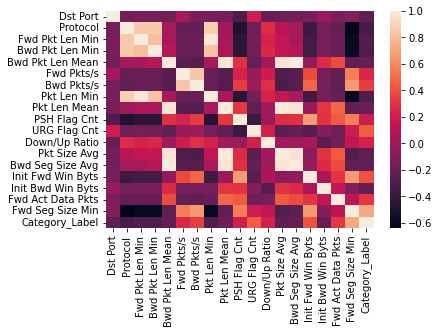

In [66]:
sns.heatmap(db.corr())

In [67]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Fwd Pkt Len Min    1048575 non-null  int64  
 3   Bwd Pkt Len Min    1048575 non-null  int64  
 4   Bwd Pkt Len Mean   1048575 non-null  float64
 5   Fwd Pkts/s         1048575 non-null  float64
 6   Bwd Pkts/s         1048575 non-null  float64
 7   Pkt Len Min        1048575 non-null  int64  
 8   Pkt Len Mean       1048575 non-null  float64
 9   PSH Flag Cnt       1048575 non-null  int64  
 10  URG Flag Cnt       1048575 non-null  int64  
 11  Down/Up Ratio      1048575 non-null  int64  
 12  Pkt Size Avg       1048575 non-null  float64
 13  Bwd Seg Size Avg   1048575 non-null  float64
 14  Init Fwd Win Byts  1048575 non-null  int64  
 15  Init Bwd Win Byts  1048575 non-n

### 1.б Отбор признаков с использованием матрицы корреляции и случайного леса

## Методы отбора признаков <a href = https://waksoft.susu.ru/2021/02/09/otbor-priznakov-s-pomoshhyu-scikit-learn-v-python/>ссылка</a>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

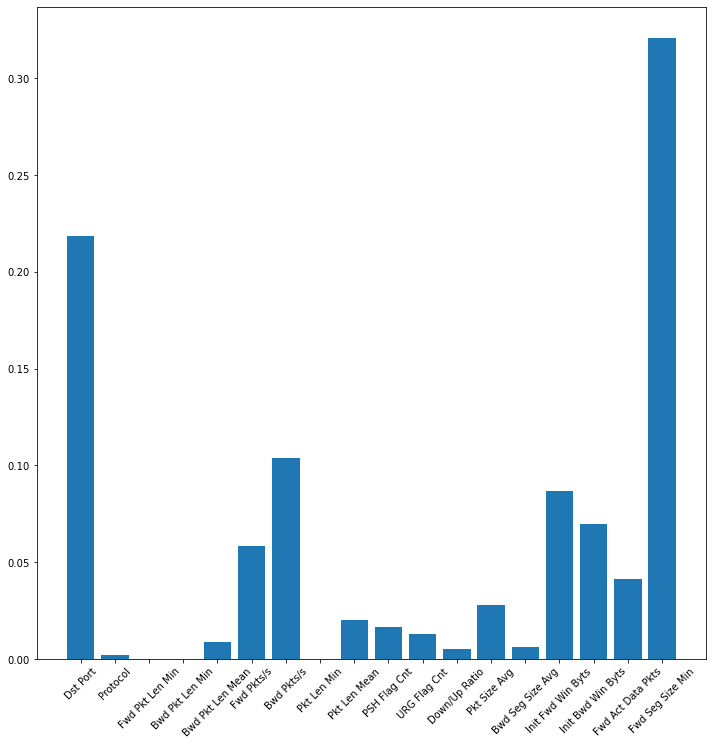

In [72]:
from sklearn.ensemble import RandomForestClassifier

X = db_full[['Dst Port', 'Protocol', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
             'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Mean', 'PSH Flag Cnt',
             'URG Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Seg Size Avg', 'Init Fwd Win Byts',
             'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']]
y = db['Category_Label']

clf = RandomForestClassifier()
clf.fit(X, y)

plt.figure(figsize=(12,12))
plt.bar(X.columns, clf.feature_importances_)
plt.xticks(rotation=45)

# 2. Метод отбора признаков с использованием случайного леса

In [73]:
X.describe()

,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Min,Bwd Pkt Len Mean,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Mean,PSH Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,8.389535e+00,2.016587e+01,9.275989e+01,1.413886e+05,1.258575e+05,8.322709e+00,6.311424e+01,5.254312e-01,1.211463e-01,6.634537e-01,7.144445e+01,9.275989e+01,1.050166e+04,6.142295e+03,2.793536e+00,2.327970e+01
std,1.444344e+04,4.460625e+00,1.948279e+01,4.653823e+01,1.579997e+02,3.085265e+05,2.670306e+05,1.890669e+01,1.007340e+02,4.993531e-01,3.262974e-01,5.652833e-01,1.051520e+02,1.579997e+02,1.293709e+04,1.814980e+04,5.557106e+00,1.106185e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.729304e+00,1.704795e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.410000e+02,-1.000000e+00,0.000000e+00,2.000000e+01
50%,5.300000e+01,6.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01,1.026694e+03,6.781981e+01,0.000000e+00,3.655556e+01,1.000000e+00,0.000000e+00,1.000000e+00,4.112500e+01,5.100000e+01,8.192000e+03,0.000000e+00,0.000000e+00,2.000000e+01
75%,4.430000e+02,6.000000e+00,0.000000e+00,0.000000e+00,1.220000e+02,1.428571e+05,1.111111e+05,0.000000e+00,9.820000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.047500e+02,1.220000e+02,2.688300e+04,2.300000e+02,4.000000e+00,3.200000e+01
max,6.553300e+04,1.700000e+01,1.460000e+03,7.320000e+02,1.459240e+03,4.000000e+06,2.000000e+06,7.880000e+02,2.521116e+03,1.000000e+00,1.000000e+00,8.000000e+01,2.522136e+03,1.459240e+03,6.553500e+04,6.553500e+04,1.031000e+03,4.800000e+01


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

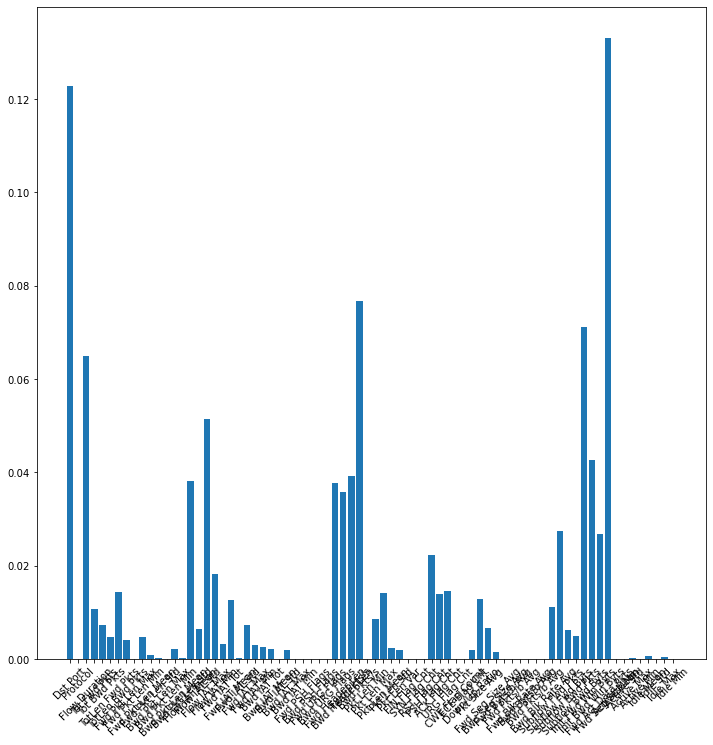

In [127]:
X = db_full.select_dtypes(exclude=['object']).copy()
X.drop(columns=['Flow Byts/s', 'Flow Pkts/s', 'Category_Label'],
       axis = 1, inplace=True)


y = db_full['Category_Label']

clf = RandomForestClassifier()
clf.fit(X, y)

plt.figure(figsize=(12,12))
plt.bar(X.columns, clf.feature_importances_)
plt.xticks(rotation=45)

In [102]:
pd.set_option('display.max_columns', None)
X.describe()


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Category_Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,5.021107e+01,3.325241e+02,2.016587e+01,9.275989e+01,1.113899e+02,1.583948e+06,2.101497e+06,6.306042e+06,-1.519513e+06,5.944303e+06,1.775583e+06,2.147776e+06,6.081985e+06,-1.475314e+06,5.754843e+06,4.798110e+05,6.049147e+05,1.770279e+06,8.880474e+04,2.659419e-02,1.560079e+02,1.727050e+02,1.413886e+05,1.258575e+05,8.322709e+00,3.375417e+02,6.311424e+01,9.570919e+01,3.092890e+04,3.572467e-03,2.659419e-02,3.960422e-02,5.254312e-01,2.634699e-01,1.211463e-01,0.0,3.960327e-02,6.634537e-01,7.144445e+01,3.879579e+01,9.275989e+01,0.0,0.0,0.0,0.0,0.0,0.0,6.206622e+00,4.479936e+02,7.211191e+00,4.521803e+03,1.050166e+04,6.142295e+03,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06,1.542201e+00
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,8.518887e+01,4.938587e+02,4.653823e+01,1.579997e+02,1.860082e+02,3.332477e+08,7.332938e+08,1.530125e+09,1.640806e+09,1.260287e+09,3.332505e+08,7.332951e+08,1.530123e+09,1.640806e+09,2.257935e+07,2.291242e+06,2.612809e+06,7.985050e+06,1.690612e+06,1.608943e-01,1.078119e+03,2.103964e+03,3.085265e+05,2.670306e+05,1.890669e+01,5.023828e+02,1.007340e+02,1.475421e+02,1.170697e+05,5.966329e-02,1.608943e-01,1.950276e-01,4.993531e-01,4.405153e-01,3.262974e-01,0.0,1.950254e-01,5.652833e-01,1.051520e+02,5.331882e+01,1.579997e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.447851e+01,1.573541e+04,1.048682e+02,1.515021e+05,1.293709e+04,1.814980e+04,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07,7.784714e-01
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.407010e+11,0.000000e+

In [128]:

feature_importanse = pd.DataFrame(clf.feature_importances_, X.columns)
feature_importanse.head()

,0
Dst Port,0.122840
Protocol,0.000003
Flow Duration,0.065044
Tot Fwd Pkts,0.010772
Tot Bwd Pkts,0.007212


### 2.а Наиболее весомые признакие для Bruteforse

In [146]:
for par_name, data in feature_importanse[0].items():
    if (data >= 0.035) and (data < 1):
        print("par_name:",par_name , "\ndata:",data)

par_name: Dst Port 
data: 0.12283977594294376
par_name: Flow Duration 
data: 0.0650439421600832
par_name: Flow IAT Mean 
data: 0.038085958666259453
par_name: Flow IAT Max 
data: 0.05145591383695391
par_name: Fwd Header Len 
data: 0.03780638955742887
par_name: Bwd Header Len 
data: 0.03577189645240044
par_name: Fwd Pkts/s 
data: 0.03913448329304181
par_name: Bwd Pkts/s 
data: 0.07677253031072033
par_name: Init Fwd Win Byts 
data: 0.07112768292743828
par_name: Init Bwd Win Byts 
data: 0.042744997880105
par_name: Fwd Seg Size Min 
data: 0.13316029682114242


### Подготовка данных и создание модели

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [155]:
train_data = db_full[['Dst Port', 'Flow Duration', 'Flow IAT Mean',
                      'Flow IAT Max', 'Fwd Header Len', 'Bwd Header Len',
                      'Fwd Pkts/s', 'Bwd Pkts/s', 'Init Fwd Win Byts',
                      'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Category_Label']]
train_data = train_data.sample(frac=1).reset_index(drop=True) 

In [156]:
Y = train_data['Category_Label']
X = train_data.drop(columns='Category_Label')

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)
X_train.shape, y_train.shape

((734002, 11), (734002,))

In [190]:
first_tree = DecisionTreeClassifier(random_state=5)

In [191]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9999727521178412

### Подбор гиперпараметров

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
tree_params = {'max_depth': np.arange(1,11)}

In [194]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5)

In [195]:
%%time
tree_grid.fit(X_train, y_train);

CPU times: user 46.2 s, sys: 3.24 s, total: 49.4 s
Wall time: 50 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [196]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 5}, 0.9999727521178412)

### Оценка на отлоденной выборке

In [197]:
tree_valid_pred = tree_grid.predict(X_test)

In [198]:
tree_grid.score(X_test, y_test)

0.9999682108763308

In [199]:
from sklearn.metrics import accuracy_score

In [200]:
accuracy_score(y_test, tree_valid_pred)

0.9999682108763308